In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')
import random
import pickle

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

# Data Loading

In [2]:
data = pd.read_csv(r"C:\Users\skans\Documents\wetransfer_heart-disease-types-docx_2022-04-28_1314\heart_disease_uci.csv")

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.shape

(920, 16)

# Data set Description

In [5]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
data.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [7]:
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


1. age: The person's age in years

2. sex: The person's sex (1 = male, 0 = female)

3. cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5. chol: The person's cholesterol measurement in mg/dl

6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8. thalach: The person's maximum heart rate achieved

9. exang: Exercise induced angina (1 = yes; 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12. ca: The number of major vessels (0-3)

13. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14. target: Heart disease (0 = no, 1 = yes)

Heart disease risk factors to the following: high cholesterol, high blood pressure, diabetes, weight, family history and smoking . 

According to another source , the major factors that can't be changed are: increasing age, male gender and heredity. 

Note that thalassemia, one of the variables in this dataset, is heredity. 

Major factors that can be modified are: Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes. 

Other factors include stress, alcohol and poor diet/nutrition.

In [9]:
#checking null values in dataset
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

###So, we have  missing values

In [10]:
data['fbs'].value_counts()

False    692
True     138
Name: fbs, dtype: int64

In [11]:
data['exang'].value_counts()

False    528
True     337
Name: exang, dtype: int64

In [12]:
data['restecg'].value_counts()

normal              551
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64

In [13]:
data['slope'].value_counts()

flat           345
upsloping      203
downsloping     63
Name: slope, dtype: int64

In [14]:
data.shape

(920, 16)

In [15]:
#Dropping null values
data.dropna(inplace=True)

In [16]:
data.shape

(299, 16)

In [14]:
data.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [17]:
data.head(2)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2


# LabelEncoding

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
objList = ['sex','cp','fbs','restecg','exang','slope','thal']
for feat in objList:
    data[feat] = le.fit_transform(data[feat].astype(str))
print (data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 748
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        299 non-null    int64  
 1   age       299 non-null    int64  
 2   sex       299 non-null    int32  
 3   dataset   299 non-null    object 
 4   cp        299 non-null    int32  
 5   trestbps  299 non-null    float64
 6   chol      299 non-null    float64
 7   fbs       299 non-null    int32  
 8   restecg   299 non-null    int32  
 9   thalch    299 non-null    float64
 10  exang     299 non-null    int32  
 11  oldpeak   299 non-null    float64
 12  slope     299 non-null    int32  
 13  ca        299 non-null    float64
 14  thal      299 non-null    int32  
 15  num       299 non-null    int64  
dtypes: float64(5), int32(7), int64(3), object(1)
memory usage: 31.5+ KB
None


In [20]:
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,Cleveland,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,Cleveland,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,3,67,1,Cleveland,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,4,37,1,Cleveland,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,0,Cleveland,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,300,68,1,Cleveland,0,144.0,193.0,1,1,141.0,0,3.4,1,2.0,2,2
300,301,57,1,Cleveland,0,130.0,131.0,0,1,115.0,1,1.2,1,1.0,2,3
301,302,57,0,Cleveland,1,130.0,236.0,0,0,174.0,0,0.0,1,1.0,1,1
508,509,47,1,Hungary,0,150.0,226.0,0,1,98.0,1,1.5,1,0.0,2,1


In [21]:
#dropping unnecesary columns
data.drop(['id'],axis = 1, inplace = True)
data.drop(['dataset'],axis = 1, inplace = True)

# Exploratory Data Analysis (EDA)

0    160
1     56
2     35
3     35
4     13
Name: num, dtype: int64


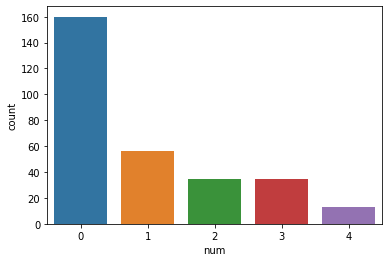

In [22]:
y = data["num"]

sns.countplot(y)


target_temp = data.num.value_counts()

print(target_temp)

# Percentage of patient with or without heart problems in the given dataset

In [23]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/299,2)))
print("Percentage of patience with heart problem 1 st stage: "+str(round(target_temp[1]*100/299,2)))
print("Percentage of patience with heart problem 2nd stage: "+str(round(target_temp[2]*100/299,2)))
print("Percentage of patience with heart problem 3rd stage: "+str(round(target_temp[3]*100/299,2)))
print("Percentage of patience with heart problem 4th stage : "+str(round(target_temp[4]*100/299,2)))


Percentage of patience without heart problems: 53.51
Percentage of patience with heart problem 1 st stage: 18.73
Percentage of patience with heart problem 2nd stage: 11.71
Percentage of patience with heart problem 3rd stage: 11.71
Percentage of patience with heart problem 4th stage : 4.35


In [24]:
data["sex"].unique()

array([1, 0])

<AxesSubplot:xlabel='sex', ylabel='num'>

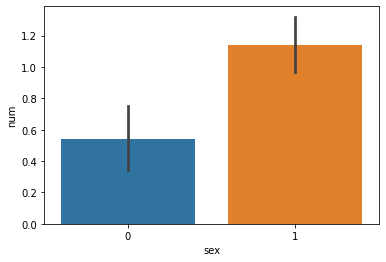

In [25]:
sns.barplot(data["sex"],y)

### Here 0 is female and 1 is male patients

In [26]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:32.11%
Percentage of Male Patients:67.89%


# Heart Disease Frequency for ages

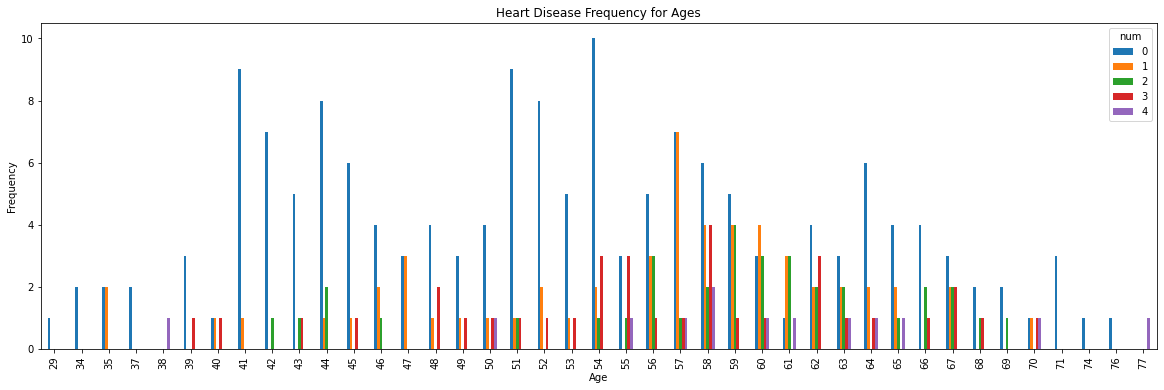

In [27]:
pd.crosstab(data.age,data.num).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

# Heart Disease frequency for sex 

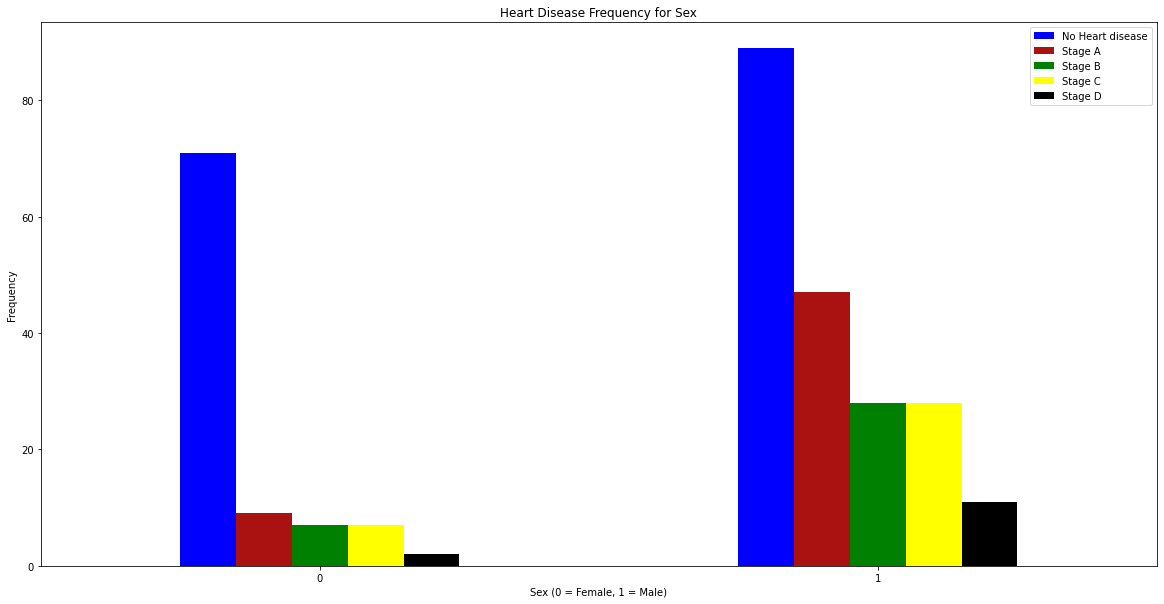

In [28]:
pd.crosstab(data.sex,data.num).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111','green','yellow','black' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Heart disease", "Stage A","Stage B","Stage C","Stage D"])
plt.ylabel('Frequency')
plt.show()

# Analysing the chest pain (4 types of chest pain)

#[Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic]

In [29]:
data["cp"].unique()

array([3, 0, 2, 1])

<AxesSubplot:xlabel='cp', ylabel='num'>

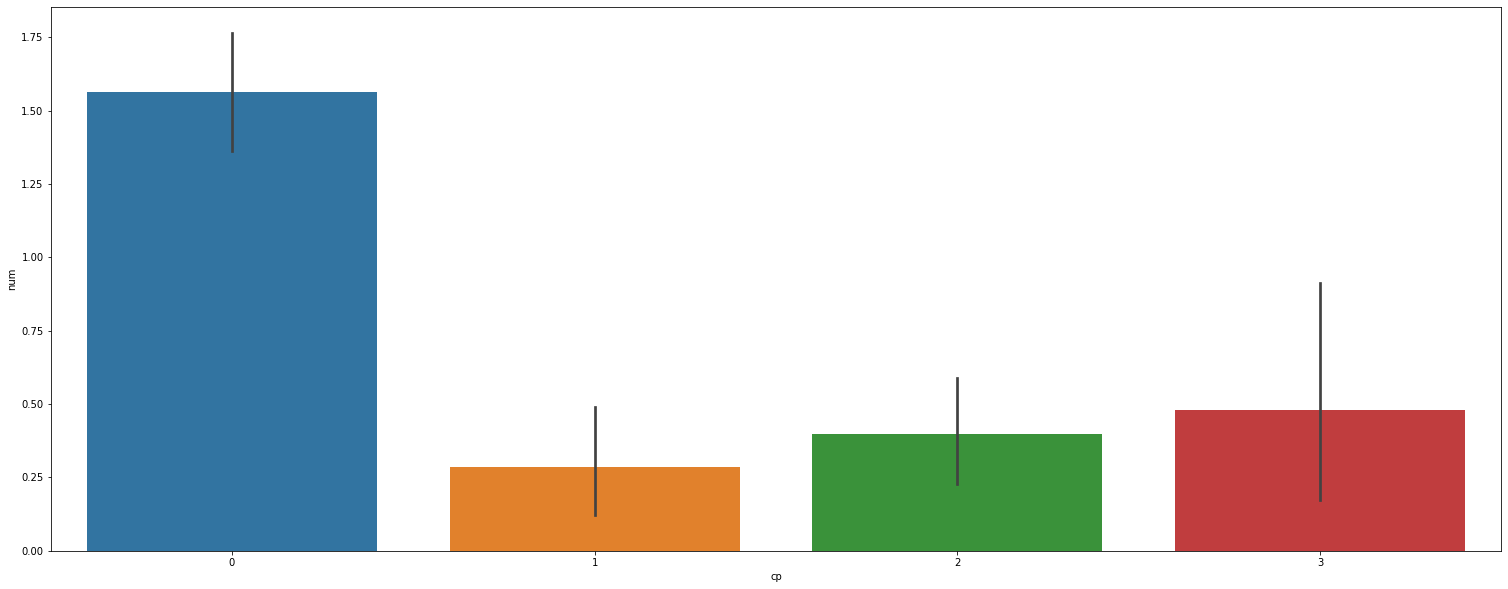

In [30]:
plt.figure(figsize=(26, 10))
sns.barplot(data["cp"],y)

# Analysing The person's resting blood pressure (mm Hg on admission to the hospital)

In [31]:
data["trestbps"].unique()

array([145., 160., 120., 130., 140., 172., 150., 110., 132., 117., 135.,
       112., 105., 124., 125., 142., 128., 170., 155., 104., 180., 138.,
       108., 134., 122., 115., 118., 100., 200.,  94., 165., 102., 152.,
       101., 126., 174., 148., 178., 158., 192., 129., 144., 123., 136.,
       146., 106., 156., 154., 114., 164.])

<AxesSubplot:xlabel='trestbps', ylabel='num'>

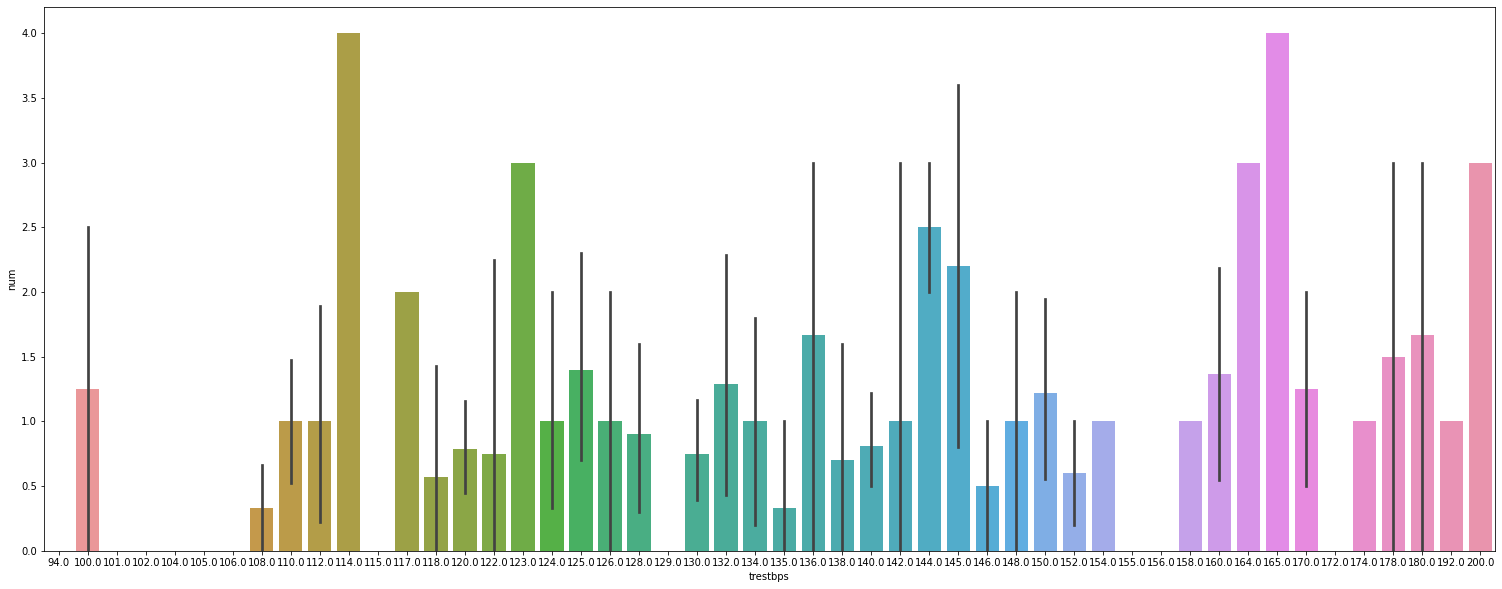

In [32]:
plt.figure(figsize=(26, 10))
sns.barplot(data["trestbps"],y)

## people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

# Analysing the slope of the peak exercise ST segment 

In [33]:
data["slope"].unique()

array([0, 1, 2])

<AxesSubplot:xlabel='slope', ylabel='num'>

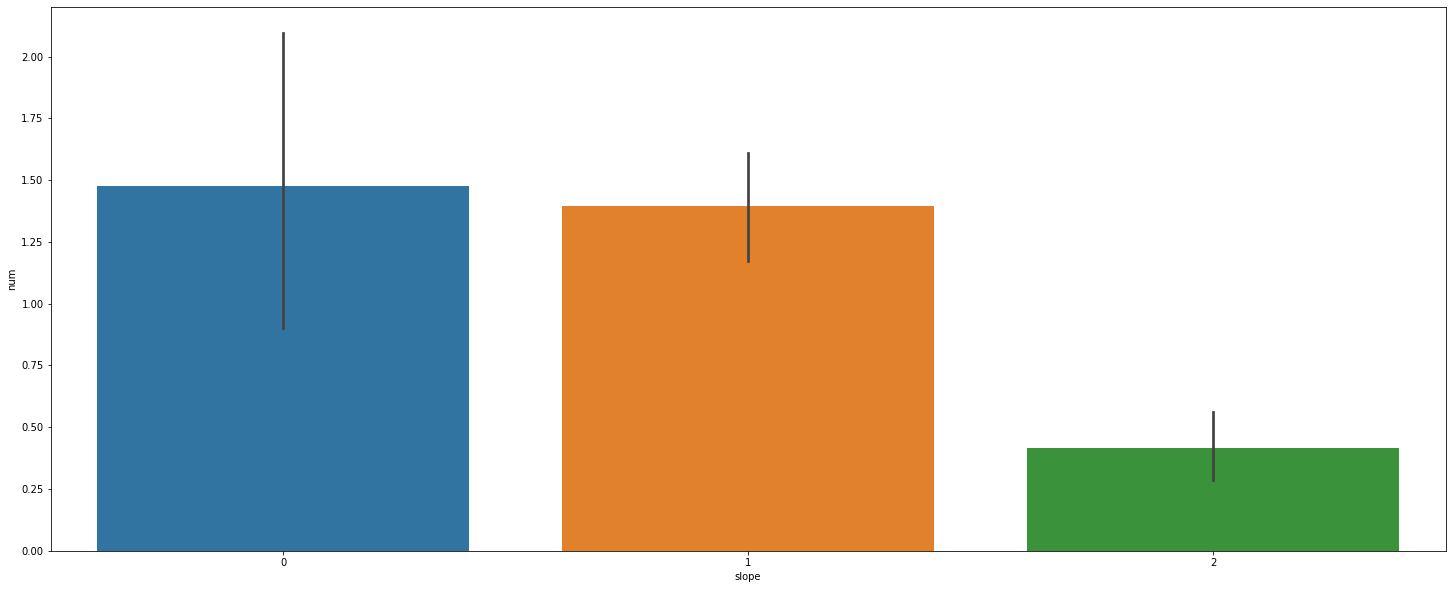

In [34]:
plt.figure(figsize=(25, 10))
sns.barplot(data["slope"],y)

Slope '0' causes heart pain much more than Slope  '1'and'2'

#Heart disease according to Fasting Blood sugar 


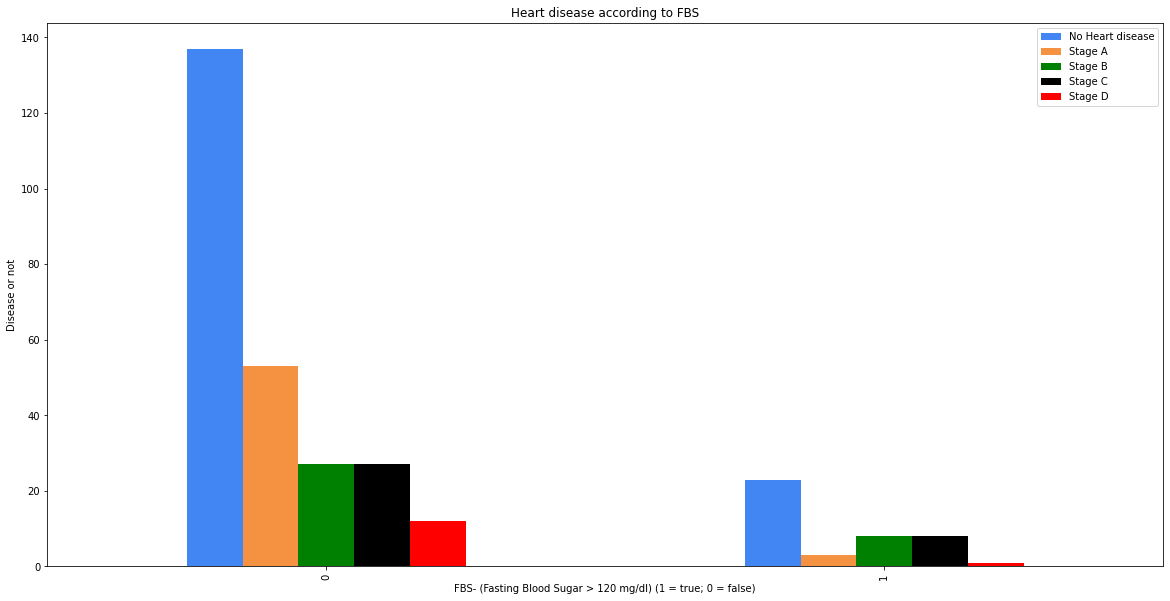

In [35]:
pd.crosstab(data.fbs,data.num).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242','green','black','red'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["No Heart disease", "Stage A","Stage B","Stage C","Stage D"])
plt.ylabel('Disease or not')
plt.show()

# Correlation plot

Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two, numerically measured, continuous variables (e.g. height and weight)

In [36]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

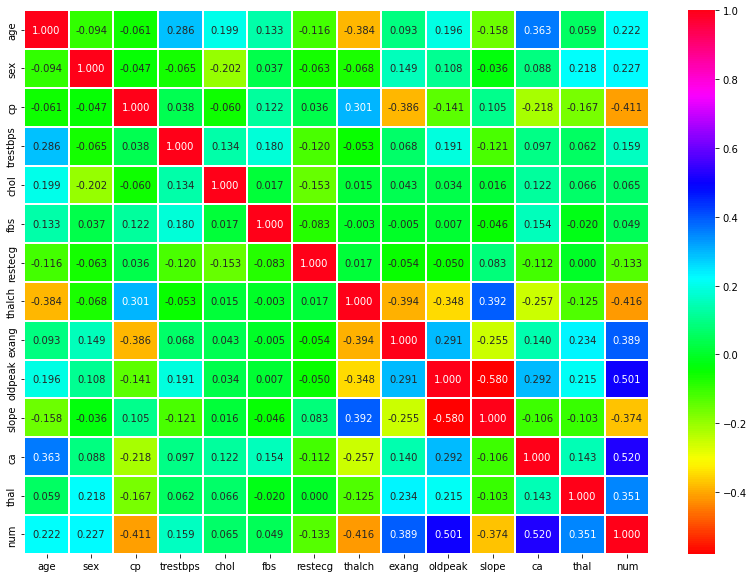

In [37]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

# Splitting the dataset to Train and Test

In [38]:
data.shape

(299, 14)

In [39]:
predictors = data.drop("num",axis=1)
target = data["num"]


In [40]:
target.value_counts()

0    160
1     56
2     35
3     35
4     13
Name: num, dtype: int64

In [42]:
print("Before OverSampling, counts of label '0': {}".format(sum(target == 0))) 
print("Before OverSampling, counts of label '1': {}".format(sum(target == 1))) 
print("Before OverSampling, counts of label '2': {}".format(sum(target == 2))) 
print("Before OverSampling, counts of label '3': {}".format(sum(target == 3))) 
print("Before OverSampling, counts of label '4': {}\n".format(sum(target == 4))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 42) 
predictors_res, target_res = sm.fit_resample(predictors,target.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(predictors_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(target_res.shape)) 
  
print("After OverSampling, counts of label '0': {}".format(sum(target_res == 0))) 
print("After OverSampling, counts of label '1': {}".format(sum(target_res == 1))) 
print("After OverSampling, counts of label '2': {}".format(sum(target_res == 2)))
print("After OverSampling, counts of label '3': {}".format(sum(target_res == 3)))
print("After OverSampling, counts of label '4': {}".format(sum(target_res == 4)))



Before OverSampling, counts of label '0': 160
Before OverSampling, counts of label '1': 56
Before OverSampling, counts of label '2': 35
Before OverSampling, counts of label '3': 35
Before OverSampling, counts of label '4': 13

After OverSampling, the shape of train_X: (800, 13)
After OverSampling, the shape of train_y: (800,) 

After OverSampling, counts of label '0': 160
After OverSampling, counts of label '1': 160
After OverSampling, counts of label '2': 160
After OverSampling, counts of label '3': 160
After OverSampling, counts of label '4': 160


In [ ]:
"""from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(predictors))"""

In [43]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(predictors_res,target_res,stratify=target_res,random_state = 42)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(600, 13)
(200, 13)
(600,)
(200,)


In [85]:
results = pd.DataFrame(columns=['model', 'Classifier' , 'Train-Accuracy', 'Test-Accuracy' ])


# KNN

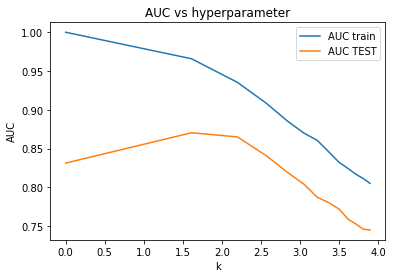

optimal alpha for which auc is maximum :  5


In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math

k = list(range(1,50,4))

train_auc = []
test_auc = []

for i in k:
    clf = KNeighborsClassifier(n_neighbors = i,algorithm='brute')
    clf.fit(X_train,y_train)
    prob_cv = clf.predict_proba(X_test)
    test_auc.append(roc_auc_score(y_test,prob_cv, multi_class="ovr"))
    prob_train = clf.predict_proba(X_train)
    train_auc.append(roc_auc_score(y_train,prob_train,multi_class='ovr'))
optimal_k = k[test_auc.index(max(test_auc))]
k = [math.log(x) for x in k]

#plot auc vs alpha
x = plt.subplot( )
x.plot(k, train_auc, label='AUC train')
x.plot(k, test_auc, label='AUC TEST')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_k)



AUC on Test data is 0.8703593749999999
AUC on Train data is 0.9657829861111111


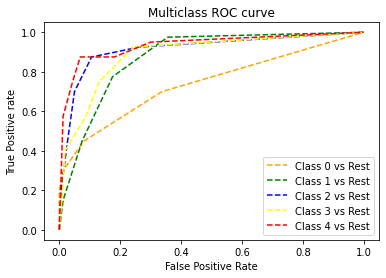

In [71]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5
#Testing AUC on Test data
knn = KNeighborsClassifier(n_neighbors = optimal_k,algorithm='brute')
knn.fit(X_train,y_train)
# filename = '/content/drive/MyDrive/Heart disease/Heartdisease_knn.pkl'
# pickle.dump(knn, open(filename, 'wb'))

pred_test = knn.predict_proba(X_test)
# fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_test)
pred_train = knn.predict_proba(X_train)

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_test[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  
print("\n")
print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test,multi_class="ovr")))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train,multi_class="ovr")))

<AxesSubplot:>

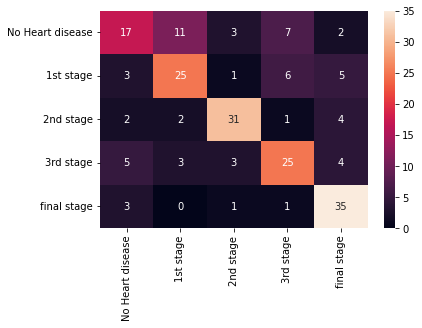

In [72]:
from sklearn.metrics import confusion_matrix
pred_knn = knn.predict(X_test)
class_names = ['No Heart disease','1st stage','2nd stage','3rd stage','final stage']
matrix= pd.DataFrame(confusion_matrix(y_test, pred_knn), index=class_names, columns=class_names )
sns.heatmap(matrix,annot = True, fmt = "d")

In [86]:
new = ['KNN','KNeighborsClassifier',0.9657,0.8703]
results.loc[0] = new

# Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]

param_grid={'n_estimators':n_estimators , 'max_depth':dept}
RF = RandomForestClassifier()
model = GridSearchCV(RF,param_grid,scoring='accuracy',n_jobs=-1,cv=3)
model.fit(X_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal n_estimators 100
optimal max_depth 500


In [75]:
optimal_n_estimators = model.best_estimator_.n_estimators
optimal_max_depth = model.best_estimator_.max_depth



AUC on Test data is 0.9643124999999999
AUC on Train data is 1.0


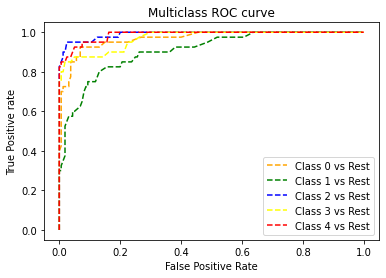

In [76]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 5
#training our model for max_depth=500,n_estimators = 120
rf = RandomForestClassifier(max_depth = optimal_max_depth,n_estimators = optimal_n_estimators)
rf.fit(X_train,y_train)
filename = r'C:\Users\skans\Documents\wetransfer_heart-disease-types-docx_2022-04-28_1314\Heartdisease_RandomForest.pkl'
pickle.dump(rf, open(filename, 'wb'))

pred_test = rf.predict_proba(X_test)
# fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_test)
pred_train = rf.predict_proba(X_train)

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_test[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label='Class 4 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  
print("\n")
print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test,multi_class="ovr")))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train,multi_class="ovr")))

<AxesSubplot:>

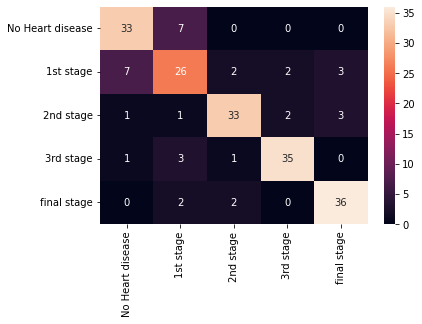

In [77]:
from sklearn.metrics import confusion_matrix
pred_rf = rf.predict(X_test)
class_names = ['No Heart disease','1st stage','2nd stage','3rd stage','final stage']
matrix= pd.DataFrame(confusion_matrix(y_test, pred_rf), index=class_names, columns=class_names )
sns.heatmap(matrix,annot = True, fmt = "d")

In [87]:
new = ['Random Forest','RandomForestClassifier',1.0,0.9640]
results.loc[1] = new

In [88]:
results

,model,Classifier,Train-Accuracy,Test-Accuracy
0,KNN,KNeighborsClassifier,0.9657,0.8703
1,Random Forest,RandomForestClassifier,1.0000,0.9640


# Prediction on testing dataset

In [89]:
filename = r'C:\Users\skans\Documents\wetransfer_heart-disease-types-docx_2022-04-28_1314\Heartdisease_RandomForest.pkl'
RF = pickle.load(open(filename, 'rb'))

In [90]:
pred_test = RF.predict_proba(X_test)

In [91]:
print("Test Accuracy :{}".format(roc_auc_score(y_test,pred_test,multi_class="ovr")))

Test Accuracy :0.9643124999999999


In [92]:
predicted = rf.predict(X_test[:20])

In [96]:
predicted

array([1, 0, 2, 1, 0, 0, 0, 3, 4, 4, 3, 2, 4, 0, 0, 2, 2, 4, 0, 2],
      dtype=int64)

In [93]:
class_names = ['No Heart disease','Stage A','Stage B','Stage C','Stage D']

In [94]:
Treatment={"No Heart disease":"Good Health",
        "Stage A":"Stage A is considered pre-heart failure. It means you are at high risk of developing heart failure because you have a family history of heart failure.The usual treatment plan for patients with Stage A heart failure is primary prevention which includes 1)regular exercise, being active, walking every day,2)quitting smoking, 3)treatment for high blood pressure (medication, low-sodium diet, active lifestyle),4)treatment for high cholesterol, 5)not drinking alcohol or using recreational drugs. 6)medications for an underlying cause such as diabetes",
        "Stage B":"Stage B is considered to be asymptomatic or silent heart failure. It means you have been diagnosed with systolic left ventricular dysfunction but have never had symptoms of heart failure.The usual treatment plan for patients with Stage B heart failure includes: 1)treatments listed in Stage A,2)angiotensin-converting enzyme inhibitor (ACE-I) or angiotensin II receptor blocker (ARB) ,3)beta-blocker if you have had a heart attack and your EF is 40% or lower,4)aldosterone antagonist if you have had a heart attack or if you have diabetes and an EF of 35% or less (to reduce the risk of your heart muscle getting bigger and pumping poorly),5)SGLT2 inhibitor medication,6)possible surgery or intervention as a treatment for coronary artery blockage, heart attack, or valve disease",
        "Stage C":"Patients with stage C heart failure have been diagnosed with heart failure and have currently or had previously signs and symptoms.There are many possible symptoms of heart failure. The usual treatment plan for patients with Stage C HF-rEF includes:1)treatments listed in Stages A and B,2)ACE-I, ARB or angiotensin receptor/neprilysin inhibitor combination ,3)Hydralazine/nitrate combination if other treatments don't stop your symptoms. Patients who are African-American should take this medication even if they are taking other vasodilator medications if they have moderate-to-severe symptoms,4)Medications that slow the heart rate if your heart rate is faster than 70 beats per minute and you still have symptoms despite beta-blocker,5)diuretic may be prescribed if symptoms continue, 6)restrict sodium in your diet,7)keep track of your weight every day to assess for fluid retention,8)possible fluid restriction,9)possible cardiac resynchronisation therapy,10)possible implantable cardiac defibrillator therapy",
         "Stage D":"Patients with Stage D have advanced symptoms that do not get better with treatment. This is the final stage of heart failure. They are likely to have NYHA class three to four symptoms, which means they show symptoms on mild or minimal exertion or at rest. The usual treatment plan for patients with Stage D heart failure includes: 1)Treatments listed in Stages A, B and C,2)valuation for more advanced treatment options, including heart transplant, ventricular assist devices, heart surgery, continuous infusion of intravenous inotropic drugs, palliative or hospice care or research therapies"}
 

In [95]:
pred=[]
orginal=[]
tret=[]
for i in predicted:
  classn=class_names[predicted[i]]
  org=class_names[int(y_test[i:i+1])]
  tretment=Treatment[classn]
  pred.append(classn)
  orginal.append(org)
  tret.append(tretment)

In [97]:
# Creating a data frame
df1 = pd.DataFrame(list(zip(orginal, pred, tret)), 
               columns =['original_Classlabel', 'predicted_classlebel','Treatment_For_Heartdisease'])

In [98]:
df1

,original_Classlabel,predicted_classlebel,Treatment_For_Heartdisease
0,No Heart disease,No Heart disease,Good Health
1,No Heart disease,Stage A,Stage A is considered pre-heart failure. It me...
2,Stage B,Stage B,Stage B is considered to be asymptomatic or si...
3,No Heart disease,No Heart disease,Good Health
4,No Heart disease,Stage A,Stage A is considered pre-heart failure. It me...
5,No Heart disease,Stage A,Stage A is considered pre-heart failure. It me...
6,No Heart disease,Stage A,Stage A is considered pre-heart failure. It me...
7,Stage A,Stage A,Stage A is considered pre-heart failure. It me...
8,Stage B,No Heart disease,Good Health
9,Stage B,No Heart disease,Good Health


In [99]:
i=4
pred = rf.predict(X_test[:i])
classn=class_names[pred[i-1]]
print("prediction:{}".format(classn))
print("Actual value:{}".format(class_names[y_test[i-1]]))
tre=Treatment[classn]
print("Treatment for {} is:\n{}".format(classn,tre))


prediction:Stage A
Actual value:Stage A
Treatment for Stage A is:
Stage A is considered pre-heart failure. It means you are at high risk of developing heart failure because you have a family history of heart failure.The usual treatment plan for patients with Stage A heart failure is primary prevention which includes 1)regular exercise, being active, walking every day,2)quitting smoking, 3)treatment for high blood pressure (medication, low-sodium diet, active lifestyle),4)treatment for high cholesterol, 5)not drinking alcohol or using recreational drugs. 6)medications for an underlying cause such as diabetes


In [100]:
i=5
pred = rf.predict(X_test[:i])
classn=class_names[pred[i-1]]
print("prediction:{}".format(classn))
print("Actual value:{}".format(class_names[y_test[i-1]]))
tre=Treatment[classn]
print("Treatment for {} is:\n{}".format(classn,tre))


prediction:No Heart disease
Actual value:Stage B
Treatment for No Heart disease is:
Good Health
